In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import xgboost as xgb1
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [3]:
train_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
test_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [2]:
#seperating categorical and continuous features
def features(df):
    categorical_features=[]
    continuous_features=[]
    for i in df.columns:
        if i[:3]=='cat':
            categorical_features.append(i)
        elif i[:4]=='cont':
            continuous_features.append(i)
    return categorical_features,continuous_features

In [6]:
categorical_train_features,continuous_train_features=features(train_data)
categorical_test_features,continuous_test_features=features(test_data)

In [7]:
print(len(categorical_train_features))
print(len(continuous_train_features))
print(len(categorical_test_features))
print(len(continuous_test_features))

116
14
116
14


In [8]:
test_data['loss'] = np.nan
combined_data = pd.concat([train_data, test_data])

In [10]:
no_common = []
for i in categorical_train_features:
    if train_data[i].nunique() != test_data[i].nunique():
        no_common.append(i)
print(no_common)

['cat90', 'cat92', 'cat96', 'cat99', 'cat101', 'cat102', 'cat103', 'cat105', 'cat106', 'cat109', 'cat110', 'cat113', 'cat114', 'cat116']


In [11]:
#https://github.com/Ch-Balaji/AllState-Claims-Prediction/blob/master/Final%20-%20cs-%20modelling.ipynb
def search_feature(x):
    if x in combined_remaining:
        return np.nan
    return 

#Reference https://www.geeksforgeeks.org/python-pandas-factorize/
#Reference https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe

for i in categorical_train_features:
    if train_data[i].nunique() != test_data[i].nunique():
        train_unique_set = set(train_data[i].unique())
        test_unique_set  = set(test_data[i].unique())
        remaining_train  = train_unique_set - test_unique_set
        remaining_test   = test_unique_set - train_unique_set
        
        combined_remaining = remaining_train.union(remaining_test)
        
        combined_data[i] = combined_data[i].apply(lambda x: search_feature(x),1)
    combined_data[i] = pd.factorize(combined_data[i].values,sort = True)[0]

In [12]:
x_train = combined_data[combined_data['loss'].notnull()]
x_test = combined_data[combined_data['loss'].isnull()]
y_train = np.log(x_train['loss']+100)
x_train = x_train.drop(['loss','id'],axis = 1)
x_test  = x_test.drop(['loss','id'],axis = 1)

In [13]:
print(x_train.shape)
print(x_test.shape)

(188318, 130)
(125546, 130)


In [14]:
#Doing Label Encoding to our Categeorical features for train_data
label_encoder=LabelEncoder()
for m in categorical_train_features:
    train_data[m]=label_encoder.fit_transform(x_train[m])

In [15]:
#Doing Label Encoding to our Categeorical features for test_data
label_encoder=LabelEncoder()
for m in categorical_test_features:
    test_data[m]=label_encoder.fit_transform(x_test[m])

In [18]:
#Adding PCA features
# Create a pca object with the 3 components as a parameter
pca=decomposition.PCA(n_components=3)
# Fit the PCA and transform the data for train and test
X_train_pca=pca.fit_transform(x_train)
X_test_pca=pca.fit_transform(x_test)

In [21]:
# Create a scaler object
sc = StandardScaler()
# Fit the scaler to the features and transform
X_train_std = sc.fit_transform(X_train_pca)
X_test_std = sc.fit_transform(X_test_pca)

In [24]:
#ADDING ABOVE 3 FEATURES TO OUR TRAIN DATA
x_train['Pca_feature1']=X_train_std[:,0]
x_train['Pca_feature2']=X_train_std[:,1]
x_train['Pca_feature3']=X_train_std[:,2]
#ADDING ABOVE 3 FEATURES TO OUR TEST DATA
x_test['Pca_feature1']=X_test_std[:,0]
x_test['Pca_feature2']=X_test_std[:,1]
x_test['Pca_feature3']=X_test_std[:,2]

In [27]:
n_components=50
svd=TruncatedSVD(50)
#FIT THE SVD AND TRANSFORM THE DATA FOR TRAIN AND TEST
X_train_svd=svd.fit_transform(x_train)
X_test_svd=svd.fit_transform(x_test)

In [30]:
# Create a scaler object
sc = StandardScaler()
# Fit the scaler to the features and transform
X_train_std_svd = sc.fit_transform(X_train_svd)
X_test_std_svd = sc.fit_transform(X_test_svd)

In [33]:
X_train_std_svd.shape

(188318, 50)

In [34]:
X_train_std_svd=pd.DataFrame(X_train_std_svd)
X_test_std_svd=pd.DataFrame(X_test_std_svd)

In [37]:
final_train=pd.concat([x_train,X_train_std_svd], axis=1)
final_test=pd.concat([x_test,X_test_std_svd], axis=1)

In [40]:
X_train1,X_test1,y_train1,y_test1=train_test_split(final_train,y_train,test_size = 0.2,random_state=42)

In [41]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(150654, 183)
(37664, 183)
(150654,)
(37664,)


In [42]:
model1=XGBRegressor()
model1.fit(X_train1,y_train1)
y_train_predictions=model1.predict(X_train1)
y_test_predictions=model1.predict(X_test1)
y_train_predictions1=np.exp(y_train_predictions)-100
y_test_predictions1=np.exp(y_test_predictions)-100
y_train11=np.exp(y_train1)-100
y_test11=np.exp(y_test1)-100
train_score=mean_absolute_error(y_train_predictions1,y_train11)
test_score=mean_absolute_error(y_test_predictions1,y_test11)
print('train MAE:',train_score)
print('test MAE:',test_score)

train MAE: 1059.54419164889
test MAE: 1169.1856163506195


In [43]:
xgb=XGBRegressor()
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
clf = GridSearchCV(xgb, param_test1,cv= 5, scoring='neg_mean_absolute_error',return_train_score=True,verbose=2,
                   n_jobs =-1)
clf.fit(X_train1,y_train1)
print(clf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 62.0min finished


{'max_depth': 5, 'min_child_weight': 3}


In [44]:
param_test2 = {'gamma':[i/10.0 for i in range(0,5)]}
clf = GridSearchCV(xgb, param_test2,cv= 5, scoring='neg_mean_absolute_error',return_train_score=True,verbose=2,
                   n_jobs =-1)
clf.fit(X_train1,y_train1)
print(clf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed: 23.6min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 25.3min finished


{'gamma': 0.0}


In [45]:
param_test3 = {'subsample':[i/10.0 for i in range(6,10)],'colsample_bytree':[i/10.0 for i in range(6,10)]}
clf = GridSearchCV(xgb, param_test3,cv= 5, scoring='neg_mean_absolute_error',return_train_score=True,verbose=2,n_jobs =-1)
clf.fit(X_train1,y_train1)
print(clf.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 55.4min finished


{'colsample_bytree': 0.9, 'subsample': 0.9}


In [46]:
param_test4 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
clf = GridSearchCV(xgb, param_test4,cv= 5, scoring='neg_mean_absolute_error',return_train_score=True,verbose=2,n_jobs =-1)
clf.fit(X_train1,y_train1)
print(clf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed: 24.8min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 27.3min finished


{'reg_alpha': 100}


In [51]:
d_train = xgb1.DMatrix(X_train1, label=y_train1)
d_test =  xgb1.DMatrix(final_test)

In [52]:
params = {'min_child_weight':3,'eta':0.01,'colsample_bytree':0.9,'max_depth':5,'subsample':0.9,'alpha':100,'gamma':0.0,
          'seed':1997}

In [3]:
def log_xgboost_eval_mae(pred,d_train):
    labels = d_train.get_label()
    a = mean_absolute_error(np.exp(pred)-100,np.exp(labels)-100)
    return 'mae',a

In [55]:
# https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
res = xgb1.cv(params, d_train, num_boost_round=2500, nfold=5, stratified=False,
         early_stopping_rounds=50, verbose_eval=500, feval=log_xgboost_eval_mae, maximize=False)

[0]	train-rmse:7.21348+0.00155	test-rmse:7.21348+0.00629	train-mae:3137.85913+5.41219	test-mae:3137.85913+21.64912
[500]	train-rmse:0.54366+0.00070	test-rmse:0.54755+0.00215	train-mae:1281.37722+2.54601	test-mae:1288.95293+12.50310
[1000]	train-rmse:0.51722+0.00066	test-rmse:0.52373+0.00280	train-mae:1190.36592+2.69787	test-mae:1204.45068+11.62289
[1500]	train-rmse:0.50986+0.00062	test-rmse:0.51803+0.00279	train-mae:1167.39253+2.56151	test-mae:1185.45554+11.21121
[2000]	train-rmse:0.50586+0.00063	test-rmse:0.51546+0.00278	train-mae:1155.66045+2.67692	test-mae:1177.04548+10.83263
[2499]	train-rmse:0.50312+0.00062	test-rmse:0.51406+0.00279	train-mae:1148.34219+2.61436	test-mae:1172.81902+10.81242


In [56]:
model1=xgb1.train(params,d_train,int(2499),feval=log_xgboost_eval_mae)
prediction_on_test_data=np.exp(model1.predict(d_test))-100
submission=pd.read_csv('sample_submission.csv')
submission['loss']=prediction_on_test_data
submission.to_csv('XGBOOST1_submission.csv', index=False)

In [17]:
import pickle

In [58]:
filename = 'XGBOOST_model.sav'
pickle.dump(model1, open(filename, 'wb'))

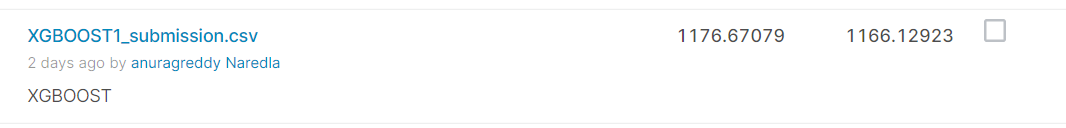

In [35]:
from IPython.display import Image
Image(filename='kaggle_scorecard_final_1.png')

#### 2.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb1
from xgboost import XGBRegressor
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from scipy.stats import skew, boxcox
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.decomposition import TruncatedSVD
from sklearn import decomposition
from sklearn.model_selection import train_test_split

In [5]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [6]:
shift=100
COMB_FEATURE = 'cat80,cat87,cat57,cat12,cat79,cat10,cat7,cat89,cat2,cat72,' \
               'cat81,cat11,cat1,cat13,cat9,cat3,cat16,cat90,cat23,cat36,' \
               'cat73,cat103,cat40,cat28,cat111,cat6,cat76,cat50,cat5,' \
               'cat4,cat14,cat38,cat24,cat82,cat25'.split(',')

In [18]:
#https://www.kaggle.com/misfyre/encoding-feature-comb-modkzs-1108-72665
def encode(charcode):
    r = 0
    ln = len(str(charcode))
    for i in range(ln):
        r += (ord(str(charcode)[i]) - ord('A') + 1) * 26 ** (ln - i - 1)
    return r
fair_constant = 2
def fair_obj(preds, dtrain):
    labels = dtrain.get_label()
    x = (preds - labels)
    den = abs(x) + fair_constant
    grad = fair_constant * x / (den)
    hess = fair_constant * fair_constant / (den * den)
    return grad, hess
def xg_eval_mae(yhat, dtrain):
    y = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(y)-shift,
                                      np.exp(yhat)-shift)
def mungeskewed(train, test, numeric_feats):
    ntrain = train.shape[0]
    test['loss'] = 0
    train_test = pd.concat((train, test)).reset_index(drop=True)
    skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
    skewed_feats = skewed_feats[skewed_feats > 0.25]
    skewed_feats = skewed_feats.index

    for feats in skewed_feats:
        train_test[feats] = train_test[feats] + 1
        train_test[feats], lam = boxcox(train_test[feats])
    return train_test, ntrain

In [10]:
numeric_feats = [x for x in train_data.columns[1:-1] if 'cont' in x]
categorical_feats = [x for x in train_data.columns[1:-1] if 'cat' in x]
train_test, ntrain = mungeskewed(train_data, test_data, numeric_feats)

In [14]:
for comb in itertools.combinations(COMB_FEATURE, 2):
    feat = comb[0] + "_" + comb[1]
    train_test[feat] = train_test[comb[0]] + train_test[comb[1]]
    train_test[feat] = train_test[feat].apply(encode)

In [16]:
categorical_feats = [x for x in train_test.columns[1:] if 'cat' in x]
for col in categorical_feats:
    train_test[col] = train_test[col].apply(encode)

In [18]:
ss = StandardScaler()
train_test[numeric_feats]=ss.fit_transform(train_test[numeric_feats].values)

In [19]:
train = train_test.iloc[:ntrain, :].copy()
test = train_test.iloc[ntrain:, :].copy()

In [20]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cat14_cat38,cat14_cat24,cat14_cat82,cat14_cat25,cat38_cat24,cat38_cat82,cat38_cat25,cat24_cat82,cat24_cat25,cat82_cat25
0,1,1,2,1,2,1,1,1,1,2,...,-373,-373,-372,-373,-373,-372,-373,-372,-373,-299
1,2,1,2,1,1,1,1,1,1,2,...,-373,-373,-373,-373,-373,-373,-373,-373,-373,-373
2,5,1,2,1,1,2,1,1,1,2,...,-373,-373,-372,-373,-373,-372,-373,-372,-373,-299
3,10,2,2,1,2,1,1,1,1,2,...,-373,-373,-354,-373,-373,-354,-373,-354,-373,-10567
4,11,1,2,1,2,1,1,1,1,2,...,-373,-373,-372,-373,-373,-372,-373,-372,-373,-299


In [21]:
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cat14_cat38,cat14_cat24,cat14_cat82,cat14_cat25,cat38_cat24,cat38_cat82,cat38_cat25,cat24_cat82,cat24_cat25,cat82_cat25
188318,4,1,2,1,1,1,1,1,1,2,...,-373,-373,-372,-373,-373,-372,-373,-372,-373,-299
188319,6,1,2,1,2,1,1,1,1,2,...,-373,-372,-372,-373,-372,-372,-373,-298,-299,-299
188320,9,1,2,1,2,2,1,2,1,2,...,-298,-299,-298,-299,-299,-298,-299,-372,-373,-299
188321,12,1,1,1,1,2,1,1,1,1,...,-372,-373,-372,-373,-299,-298,-299,-372,-373,-299
188322,15,2,1,1,1,1,2,1,1,1,...,-373,-373,-372,-373,-373,-372,-373,-372,-373,-299


In [22]:
#SAVING THE FINAL_TRAIN data and FINAL_TEST data
train.to_csv('final_train_2way.csv')
test.to_csv('final_test_2way.csv')

In [2]:
train_data=pd.read_csv("final_train_2way.csv")
test_data=pd.read_csv("final_test_2way.csv")

In [5]:
print(train_data.shape)
print(test_data.shape)

(188318, 728)
(125546, 728)


In [6]:
X_train=train_data.drop(['id','Unnamed: 0','loss'],axis=1) 
X_test=test_data.drop(['id','Unnamed: 0','loss'],axis=1)

In [7]:
#Adding PCA features
# Create a pca object with the 3 components as a parameter
pca=decomposition.PCA(n_components=3)
# Fit the PCA and transform the data for train and test
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.fit_transform(X_test)

In [8]:
# Create a scaler object
sc = StandardScaler()
# Fit the scaler to the features and transform
X_train_std = sc.fit_transform(X_train_pca)
X_test_std = sc.fit_transform(X_test_pca)

In [9]:
#ADDING ABOVE 3 FEATURES TO OUR TRAIN DATA
X_train['Pca_feature1']=X_train_std[:,0]
X_train['Pca_feature2']=X_train_std[:,1]
X_train['Pca_feature3']=X_train_std[:,2]
#ADDING ABOVE 3 FEATURES TO OUR TEST DATA
X_test['Pca_feature1']=X_test_std[:,0]
X_test['Pca_feature2']=X_test_std[:,1]
X_test['Pca_feature3']=X_test_std[:,2]

In [10]:
n_components=50
svd=TruncatedSVD(50)
#FIT THE SVD AND TRANSFORM THE DATA FOR TRAIN AND TEST
X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.fit_transform(X_test)

In [11]:
# Create a scaler object
sc = StandardScaler()
# Fit the scaler to the features and transform
X_train_std_svd = sc.fit_transform(X_train_svd)
X_test_std_svd = sc.fit_transform(X_test_svd)

In [12]:
X_train_std_svd=pd.DataFrame(X_train_std_svd)
X_test_std_svd=pd.DataFrame(X_test_std_svd)

In [13]:
final_train=pd.concat([X_train,X_train_std_svd], axis=1)
final_test=pd.concat([X_test,X_test_std_svd], axis=1)

In [14]:
final_train.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,40,41,42,43,44,45,46,47,48,49
0,1,2,1,2,1,1,1,1,2,1,...,0.131961,0.844185,0.163340,-0.330991,-0.045730,0.460895,0.524981,-0.199632,-0.256634,-0.264189
1,1,2,1,1,1,1,1,1,2,2,...,-0.071820,0.510367,0.060009,-1.367081,0.454418,-0.027229,-0.540339,-0.210758,0.863410,0.692262
2,1,2,1,1,2,1,1,1,2,2,...,-0.096164,-1.980220,0.587621,1.948362,1.191494,0.303619,-0.299972,-0.779412,0.516661,-0.228623
3,2,2,1,2,1,1,1,1,2,1,...,0.385221,0.734536,0.013318,-1.834844,0.430623,-1.665744,0.324997,-0.024321,0.570581,3.861898
4,1,2,1,2,1,1,1,1,2,2,...,-0.299481,-3.125024,-0.008607,-0.228473,-4.519482,0.118351,0.676478,-1.097436,2.173453,-0.997027


In [15]:
final_test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,40,41,42,43,44,45,46,47,48,49
0,1,2,1,1,1,1,1,1,2,1,...,0.323720,0.325841,-0.303458,-1.539892,-0.064802,-0.239008,-0.018661,0.041195,-0.005086,-0.591805
1,1,2,1,2,1,1,1,1,2,1,...,0.323865,-3.644933,0.706265,0.797931,-0.097775,0.327050,0.372819,0.875210,-0.729714,1.277468
2,1,2,1,2,2,1,2,1,2,2,...,1.563964,1.048267,-0.531257,1.447931,-1.019357,-1.116441,-2.964687,1.510831,-1.618746,-2.735809
3,1,1,1,1,2,1,1,1,1,1,...,0.754796,-0.259748,0.022583,-1.567108,0.312948,-0.771981,-0.561793,-1.310615,-0.769716,0.040426
4,2,1,1,1,1,2,1,1,1,1,...,-2.150605,0.074013,0.113948,0.761509,0.058918,-0.067984,-0.301052,-0.036983,0.443403,0.347059


In [16]:
print(final_train.shape)
print(final_test.shape)

(188318, 778)
(125546, 778)


In [17]:
Y=np.log(train_data['loss']+100)

In [19]:
d_train = xgb1.DMatrix(final_train, label=Y)
d_test =  xgb1.DMatrix(final_test)

In [20]:
params = {'min_child_weight':3,'eta':0.01,'colsample_bytree':0.9,'max_depth':5,'subsample':0.9,'alpha':100,'gamma':0.0,
          'seed':1997}

In [22]:
model2=xgb1.train(params, d_train, int(2499),obj =fair_obj,feval=xg_eval_mae)

In [23]:
prediction_on_test_data=np.exp(model2.predict(d_test))-100
submission=pd.read_csv('sample_submission.csv')
submission['loss']=prediction_on_test_data
submission.to_csv('XGBOOST2_submission2_final.csv', index=False)

In [33]:
import pickle

In [25]:
filename = 'XGBOOST2_model2_final2.sav'
pickle.dump(model2, open(filename, 'wb'))

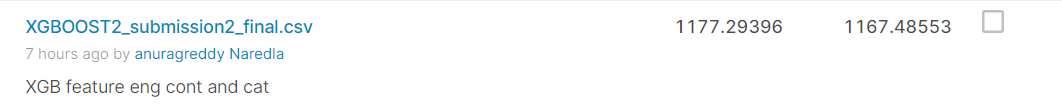

In [36]:
from IPython.display import Image
Image(filename='kaggle_scorecard_final_2.png')

### 3.

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [5]:
test_data['loss'] = np.nan
combined_data = pd.concat([train_data, test_data])

In [6]:
#seperating categorical and continuous features
def features(df):
    categorical_features=[]
    continuous_features=[]
    for i in df.columns:
        if i[:3]=='cat':
            categorical_features.append(i)
        elif i[:4]=='cont':
            continuous_features.append(i)
    return categorical_features,continuous_features

In [7]:
categorical_train_features,continuous_train_features=features(train_data)
categorical_test_features,continuous_test_features=features(test_data)

In [6]:
#https://github.com/Ch-Balaji/AllState-Claims-Prediction/blob/master/Final%20-%20cs-%20modelling.ipynb
def search_feature(x):
    if x in combined_remaining:
        return np.nan
    return 

#Reference https://www.geeksforgeeks.org/python-pandas-factorize/
#Reference https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe

for i in categorical_train_features:
    if train_data[i].nunique() != test_data[i].nunique():
        train_unique_set = set(train_data[i].unique())
        test_unique_set  = set(test_data[i].unique())
        remaining_train  = train_unique_set - test_unique_set
        remaining_test   = test_unique_set - train_unique_set
        
        combined_remaining = remaining_train.union(remaining_test)
        
        combined_data[i] = combined_data[i].apply(lambda x: search_feature(x),1)
    combined_data[i] = pd.factorize(combined_data[i].values,sort = True)[0]

In [7]:
def encode(charcode):
    r = 0
    ln = len(str(charcode))
    for i in range(ln):
        r += (ord(str(charcode)[i]) - ord('A') + 1) * 26 ** (ln - i - 1)
    return r
for i in categorical_train_features:
    combined_data[i]=combined_data[i].apply(encode)

In [8]:
combined_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,-16,-15,-16,-15,-16,-16,-16,-16,-15,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,-16,-15,-16,-16,-16,-16,-16,-16,-15,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,-16,-15,-16,-16,-15,-16,-16,-16,-15,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,-15,-15,-16,-15,-16,-16,-16,-16,-15,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,-16,-15,-16,-15,-16,-16,-16,-16,-15,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [9]:
#https://www.kaggle.com/misfyre/encoding-feature-comb-modkzs-1108-72665

COMB_FEATURE = 'cat80,cat87,cat57,cat12,cat79,cat10,cat7,cat89,cat2,cat72,' \
               'cat81,cat11,cat1,cat13,cat9,cat3,cat16,cat90,cat23,cat36,' \
               'cat73,cat103,cat40,cat28,cat111,cat6,cat76,cat50,cat5,' \
               'cat4,cat14,cat38,cat24,cat82,cat25'.split(',')
for i in range(len(COMB_FEATURE)):
    for j in range(i+1,len(COMB_FEATURE)):
        feat = COMB_FEATURE[i] + '_' + COMB_FEATURE[j]
        combined_data[feat] = combined_data[COMB_FEATURE[i]] + combined_data[COMB_FEATURE[j]]
        combined_data[feat] = combined_data[feat].apply(encode)

In [10]:
combined_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cat14_cat38,cat14_cat24,cat14_cat82,cat14_cat25,cat38_cat24,cat38_cat82,cat38_cat25,cat24_cat82,cat24_cat25,cat82_cat25
0,1,-16,-15,-16,-15,-16,-16,-16,-16,-15,...,-13196,-13196,-13197,-13196,-13196,-13197,-13196,-13197,-13196,-13197
1,2,-16,-15,-16,-16,-16,-16,-16,-16,-15,...,-13196,-13196,-13196,-13196,-13196,-13196,-13196,-13196,-13196,-13196
2,5,-16,-15,-16,-16,-15,-16,-16,-16,-15,...,-13196,-13196,-13197,-13196,-13196,-13197,-13196,-13197,-13196,-13197
3,10,-15,-15,-16,-15,-16,-16,-16,-16,-15,...,-13196,-13196,-13215,-13196,-13196,-13215,-13196,-13215,-13196,-13215
4,11,-16,-15,-16,-15,-16,-16,-16,-16,-15,...,-13196,-13196,-13197,-13196,-13196,-13197,-13196,-13197,-13196,-13197


In [11]:
train_data_df = combined_data[combined_data['loss'].notnull()]
test_data_df = combined_data[combined_data['loss'].isnull()]

In [12]:
train_data_df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cat14_cat38,cat14_cat24,cat14_cat82,cat14_cat25,cat38_cat24,cat38_cat82,cat38_cat25,cat24_cat82,cat24_cat25,cat82_cat25
0,1,-16,-15,-16,-15,-16,-16,-16,-16,-15,...,-13196,-13196,-13197,-13196,-13196,-13197,-13196,-13197,-13196,-13197
1,2,-16,-15,-16,-16,-16,-16,-16,-16,-15,...,-13196,-13196,-13196,-13196,-13196,-13196,-13196,-13196,-13196,-13196
2,5,-16,-15,-16,-16,-15,-16,-16,-16,-15,...,-13196,-13196,-13197,-13196,-13196,-13197,-13196,-13197,-13196,-13197
3,10,-15,-15,-16,-15,-16,-16,-16,-16,-15,...,-13196,-13196,-13215,-13196,-13196,-13215,-13196,-13215,-13196,-13215
4,11,-16,-15,-16,-15,-16,-16,-16,-16,-15,...,-13196,-13196,-13197,-13196,-13196,-13197,-13196,-13197,-13196,-13197


In [13]:
test_data_df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cat14_cat38,cat14_cat24,cat14_cat82,cat14_cat25,cat38_cat24,cat38_cat82,cat38_cat25,cat24_cat82,cat24_cat25,cat82_cat25
0,4,-16,-15,-16,-16,-16,-16,-16,-16,-15,...,-13196,-13196,-13197,-13196,-13196,-13197,-13196,-13197,-13196,-13197
1,6,-16,-15,-16,-15,-16,-16,-16,-16,-15,...,-13196,-13197,-13197,-13196,-13197,-13197,-13196,-13198,-13197,-13197
2,9,-16,-15,-16,-15,-15,-16,-15,-16,-15,...,-13198,-13197,-13198,-13197,-13197,-13198,-13197,-13197,-13196,-13197
3,12,-16,-16,-16,-16,-15,-16,-16,-16,-16,...,-13197,-13196,-13197,-13196,-13197,-13198,-13197,-13197,-13196,-13197
4,15,-15,-16,-16,-16,-16,-15,-16,-16,-16,...,-13196,-13196,-13197,-13196,-13196,-13197,-13196,-13197,-13196,-13197


In [14]:
train_data_df = train_data_df.drop(['loss','id'],axis = 1)
test_data_df = test_data_df.drop(['loss','id'],axis = 1)

In [15]:
train_data_df.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat14_cat38,cat14_cat24,cat14_cat82,cat14_cat25,cat38_cat24,cat38_cat82,cat38_cat25,cat24_cat82,cat24_cat25,cat82_cat25
0,-16,-15,-16,-15,-16,-16,-16,-16,-15,-16,...,-13196,-13196,-13197,-13196,-13196,-13197,-13196,-13197,-13196,-13197
1,-16,-15,-16,-16,-16,-16,-16,-16,-15,-15,...,-13196,-13196,-13196,-13196,-13196,-13196,-13196,-13196,-13196,-13196
2,-16,-15,-16,-16,-15,-16,-16,-16,-15,-15,...,-13196,-13196,-13197,-13196,-13196,-13197,-13196,-13197,-13196,-13197
3,-15,-15,-16,-15,-16,-16,-16,-16,-15,-16,...,-13196,-13196,-13215,-13196,-13196,-13215,-13196,-13215,-13196,-13215
4,-16,-15,-16,-15,-16,-16,-16,-16,-15,-15,...,-13196,-13196,-13197,-13196,-13196,-13197,-13196,-13197,-13196,-13197


In [16]:
test_data_df.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat14_cat38,cat14_cat24,cat14_cat82,cat14_cat25,cat38_cat24,cat38_cat82,cat38_cat25,cat24_cat82,cat24_cat25,cat82_cat25
0,-16,-15,-16,-16,-16,-16,-16,-16,-15,-16,...,-13196,-13196,-13197,-13196,-13196,-13197,-13196,-13197,-13196,-13197
1,-16,-15,-16,-15,-16,-16,-16,-16,-15,-16,...,-13196,-13197,-13197,-13196,-13197,-13197,-13196,-13198,-13197,-13197
2,-16,-15,-16,-15,-15,-16,-15,-16,-15,-15,...,-13198,-13197,-13198,-13197,-13197,-13198,-13197,-13197,-13196,-13197
3,-16,-16,-16,-16,-15,-16,-16,-16,-16,-16,...,-13197,-13196,-13197,-13196,-13197,-13198,-13197,-13197,-13196,-13197
4,-15,-16,-16,-16,-16,-15,-16,-16,-16,-16,...,-13196,-13196,-13197,-13196,-13196,-13197,-13196,-13197,-13196,-13197


In [17]:
#Adding PCA features
# Create a pca object with the 3 components as a parameter
pca=decomposition.PCA(n_components=3)
# Fit the PCA and transform the data for train and test
X_train_pca=pca.fit_transform(train_data_df)
X_test_pca=pca.fit_transform(test_data_df)

In [18]:
# Create a scaler object
sc = StandardScaler()
# Fit the scaler to the features and transform
X_train_std = sc.fit_transform(X_train_pca)
X_test_std = sc.fit_transform(X_test_pca)

In [19]:
#ADDING ABOVE 3 FEATURES TO OUR TRAIN DATA
train_data_df['Pca_feature1']=X_train_std[:,0]
train_data_df['Pca_feature2']=X_train_std[:,1]
train_data_df['Pca_feature3']=X_train_std[:,2]
#ADDING ABOVE 3 FEATURES TO OUR TEST DATA
test_data_df['Pca_feature1']=X_test_std[:,0]
test_data_df['Pca_feature2']=X_test_std[:,1]
test_data_df['Pca_feature3']=X_test_std[:,2]

In [20]:
n_components=50
svd=TruncatedSVD(50)
#FIT THE SVD AND TRANSFORM THE DATA FOR TRAIN AND TEST
X_train_svd=svd.fit_transform(train_data_df)
X_test_svd=svd.fit_transform(test_data_df)

In [21]:
# Create a scaler object
sc = StandardScaler()
# Fit the scaler to the features and transform
X_train_std_svd = sc.fit_transform(X_train_svd)
X_test_std_svd = sc.fit_transform(X_test_svd)

In [22]:
X_train_std_svd=pd.DataFrame(X_train_std_svd)
X_test_std_svd=pd.DataFrame(X_test_std_svd)

In [23]:
final_train=pd.concat([train_data_df,X_train_std_svd], axis=1)
final_test=pd.concat([test_data_df,X_test_std_svd], axis=1)

In [24]:
final_train.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,40,41,42,43,44,45,46,47,48,49
0,-16,-15,-16,-15,-16,-16,-16,-16,-15,-16,...,-0.942399,0.875928,-0.121279,0.138611,0.115770,0.068855,0.347153,-0.510350,-0.333895,0.932807
1,-16,-15,-16,-16,-16,-16,-16,-16,-15,-15,...,0.605978,-0.169089,-0.846676,-0.331721,1.070744,-0.789749,-0.180237,-0.708343,0.224363,0.241301
2,-16,-15,-16,-16,-15,-16,-16,-16,-15,-15,...,0.352780,-0.325314,0.641109,-0.710322,0.286557,-0.558017,0.955337,-0.785154,-0.940848,-0.444066
3,-15,-15,-16,-15,-16,-16,-16,-16,-15,-16,...,-0.773793,0.539360,-0.716155,-0.496488,0.049526,-0.771505,0.537096,0.222697,-1.475480,-2.023982
4,-16,-15,-16,-15,-16,-16,-16,-16,-15,-15,...,-2.853130,-1.025424,3.710474,-1.793337,1.061666,-1.166366,-0.060558,0.272789,0.592269,-0.422896


In [25]:
final_test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,40,41,42,43,44,45,46,47,48,49
0,-16,-15,-16,-16,-16,-16,-16,-16,-15,-16,...,-0.771088,0.009359,0.113516,-0.632425,-0.098983,-0.154913,-0.688273,-0.599616,-0.082120,-0.364705
1,-16,-15,-16,-15,-16,-16,-16,-16,-15,-16,...,-0.228439,-0.064129,0.666350,0.211959,-0.084242,-0.070318,-0.692547,0.073749,0.349449,0.620651
2,-16,-15,-16,-15,-15,-16,-15,-16,-15,-15,...,2.137446,-2.357386,-3.081159,3.571386,-0.286644,-2.243421,-3.426088,5.629247,-0.766575,0.891323
3,-16,-16,-16,-16,-15,-16,-16,-16,-16,-16,...,2.303246,-0.911325,-1.524444,0.748366,-0.355646,0.360334,1.571305,-0.213826,1.483671,0.248615
4,-15,-16,-16,-16,-16,-15,-16,-16,-16,-16,...,-0.113978,0.039041,0.358643,0.198336,-0.017603,-0.187313,-0.702553,0.326853,-0.274659,0.222571


In [26]:
Y=np.log(train_data['loss']+100)

In [27]:
d_train = xgb1.DMatrix(final_train, label=Y)
d_test =  xgb1.DMatrix(final_test)

In [28]:
params = {'min_child_weight':3,'eta':0.01,'colsample_bytree':0.9,'max_depth':5,'subsample':0.9,'alpha':100,'gamma':0.0,
          'seed':1997}

In [14]:
def log_xgboost_eval_mae(pred,d_train):
    labels = d_train.get_label()
    a = mean_absolute_error(np.exp(pred)-100,np.exp(labels)-100)
    return 'mae',a

In [30]:
fair_constant = 2
def fair_obj(preds, dtrain):
    labels = dtrain.get_label()
    x = (preds - labels)
    den = abs(x) + fair_constant
    grad = fair_constant * x / (den)
    hess = fair_constant * fair_constant / (den * den)
    return grad, hess

In [31]:
model3=xgb1.train(params, d_train, int(2499),obj =fair_obj,feval=log_xgboost_eval_mae)

In [32]:
prediction_on_test_data=np.exp(model3.predict(d_test))-100
submission=pd.read_csv('sample_submission.csv')
submission['loss']=prediction_on_test_data
submission.to_csv('XGBOOST3_submission.csv', index=False)

In [34]:
filename = 'XGBOOST3_model3_final3.sav'
pickle.dump(model3, open(filename, 'wb'))

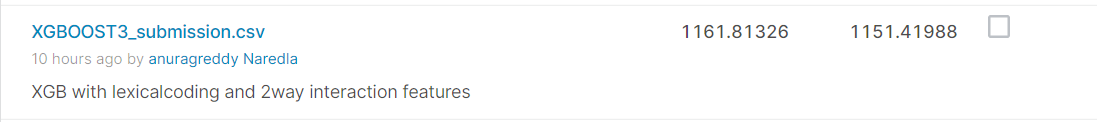

In [37]:
from IPython.display import Image
Image(filename='kaggle_scorecard_final_3.png')

#### 4.

In [3]:
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')

In [4]:
test_data['loss'] = np.nan
combined_data = pd.concat([train_data, test_data])

In [7]:
categorical_train_features,continuous_train_features=features(train_data)
categorical_test_features,continuous_test_features=features(test_data)

In [8]:
#https://github.com/Ch-Balaji/AllState-Claims-Prediction/blob/master/Final%20-%20cs-%20modelling.ipynb
def search_feature(x):
    if x in combined_remaining:
        return np.nan
    return 

#Reference https://www.geeksforgeeks.org/python-pandas-factorize/
#Reference https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe

for i in categorical_train_features:
    if train_data[i].nunique() != test_data[i].nunique():
        train_unique_set = set(train_data[i].unique())
        test_unique_set  = set(test_data[i].unique())
        remaining_train  = train_unique_set - test_unique_set
        remaining_test   = test_unique_set - train_unique_set
        
        combined_remaining = remaining_train.union(remaining_test)
        
        combined_data[i] = combined_data[i].apply(lambda x: search_feature(x),1)
    combined_data[i] = pd.factorize(combined_data[i].values,sort = True)[0]

In [9]:
x_train = combined_data[combined_data['loss'].notnull()]
x_test = combined_data[combined_data['loss'].isnull()]
y_train = np.log(x_train['loss']+100)
x_train = x_train.drop(['loss','id'],axis = 1)
x_test  = x_test.drop(['loss','id'],axis = 1)

In [10]:
print(x_train.shape)
print(x_test.shape)

(188318, 130)
(125546, 130)


In [11]:
d_train = xgb1.DMatrix(x_train, label=y_train)
d_test =  xgb1.DMatrix(x_test)

In [12]:
params = {'min_child_weight':3,'eta':0.01,'colsample_bytree':0.9,'max_depth':5,'subsample':0.9,'alpha':100,'gamma':0.0,
          'seed':1997}

In [ ]:
# Finding best rounds via cross validate xgboost with 50 early stoppings.
res = xgb1.cv(params,d_train, num_boost_round=5500, nfold=5, stratified=False,
         early_stopping_rounds=50, verbose_eval=500, show_stdv=True, feval=log_xgboost_eval_mae, maximize=False)

[0]	train-rmse:7.21357+0.00130	test-rmse:7.21357+0.00525	train-mae:3135.56499+4.96422	test-mae:3135.56494+19.85736
[500]	train-rmse:0.54523+0.00038	test-rmse:0.54686+0.00205	train-mae:1277.17869+1.75850	test-mae:1280.48447+10.68279


In [15]:
model = xgb1.train(params,d_train,int(5499), feval=log_xgboost_eval_mae)

In [16]:
prediction = np.exp(model.predict(d_test)) - 100
submission = pd.read_csv('sample_submission.csv')
submission['loss'] = prediction
submission.to_csv('final_submission.csv', index=False)

In [19]:
filename = 'XGBOOST_FINAL_SUBMISSION_MODEL.pkl'
pickle.dump(model, open(filename, 'wb'))

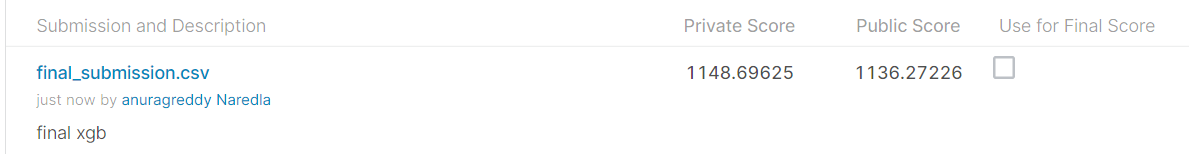

In [1]:
from IPython.display import Image
Image(filename='kaggle_scorecard_final_submission.png')